In [2]:
'''
download sentiment dataset on imbd
'''

'''
import urllib.request as req
import tarfile


imdb_url="https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

save_filename="aclImbd_v1.tar.gz"
if not os.path.exists(save_filename):
    req.urlretrieve(imdb_url,save_filename)
'''
import os
    
imdb_folder="aclImdb"

'''
if not os.path.exists(imbd_folder):
    with tarfile.open(save_filename) as tar:
        tar.extractall()
'''

        

'\nif not os.path.exists(imbd_folder):\n    with tarfile.open(save_filename) as tar:\n        tar.extractall()\n'

In [3]:
'''
process and input data
'''

import numpy as np
import re
#re库，正则表达式库

def get_reviews(data_folder="/train"):
    reviews=[]
    labels=[]
    for index,sentiment in enumerate(["/neg/","/pos/"]):
        path=imdb_folder+data_folder+sentiment
        for filename in sorted(os.listdir(path)):
            with open(path+filename,'r',encoding='gb18030',errors='ignore') as f:
                review=f.read()
                review=review.lower()  #小写化处理
                review=review.replace("<br />"," ")#网页格式处理
                review=re.sub(r"[^a-z]"," ",review)
                review=re.sub(r" +"," ",review)
                review=review.split(" ")
                reviews.append(review)
                
                label=[0,0]
                label[index]=1
                labels.append(label)
                
    return reviews,np.array(labels)
    

In [4]:
train_reviews,train_labels=get_reviews()
print(len(train_reviews))
print(train_reviews[0])
print(train_labels[0])

25000
['story', 'of', 'a', 'man', 'who', 'has', 'unnatural', 'feelings', 'for', 'a', 'pig', 'starts', 'out', 'with', 'a', 'opening', 'scene', 'that', 'is', 'a', 'terrific', 'example', 'of', 'absurd', 'comedy', 'a', 'formal', 'orchestra', 'audience', 'is', 'turned', 'into', 'an', 'insane', 'violent', 'mob', 'by', 'the', 'crazy', 'chantings', 'of', 'it', 's', 'singers', 'unfortunately', 'it', 'stays', 'absurd', 'the', 'whole', 'time', 'with', 'no', 'general', 'narrative', 'eventually', 'making', 'it', 'just', 'too', 'off', 'putting', 'even', 'those', 'from', 'the', 'era', 'should', 'be', 'turned', 'off', 'the', 'cryptic', 'dialogue', 'would', 'make', 'shakespeare', 'seem', 'easy', 'to', 'a', 'third', 'grader', 'on', 'a', 'technical', 'level', 'it', 's', 'better', 'than', 'you', 'might', 'think', 'with', 'some', 'good', 'cinematography', 'by', 'future', 'great', 'vilmos', 'zsigmond', 'future', 'stars', 'sally', 'kirkland', 'and', 'frederic', 'forrest', 'can', 'be', 'seen', 'briefly', '']


In [5]:
import zipfile

glove_url="http://nlp.stanford.edu/data/glove.6B.zip"

save_filename="glove.6B.zip"
'''
if not os.path.exists(save_filename):
    req.urlretrieve(glove_url,save_filename)
'''

    
EMBEDDING_SIZE=50
glove_filename="glove.6B.{}d.txt".format(EMBEDDING_SIZE)
if not os.path.exists(glove_filename) and EMBEDDING_SIZE in [50,100,200,300]:
    with zipfile.ZipFile(save_filename, 'r') as z:
        z.extractall()

In [6]:
from collections import defaultdict

def load_embeddings():
    with open(glove_filename,'r',encoding='gb18030',errors='ignore') as glove_vectors:
        word_to_int=defaultdict(int)
        int_to_vec=defaultdict(lambda:np.zeros([EMBEDDING_SIZE]))
        
        index=1
        for line in glove_vectors:
            fields=line.split()
            word=str(fields[0])
            vec=np.asarray(fields[1:],np.float32)
            word_to_int[word]=index
            int_to_vec[index]=vec
            index+=1
    return word_to_int,int_to_vec

word_to_int,int_to_vec=load_embeddings()

In [7]:
def review_words_to_ints(train_reviews):
    train_data=[]
    for review in train_reviews:
        int_review=[word_to_int[word] for word in review]
        train_data.append(int_review)
    return train_data

train_reviews=review_words_to_ints(train_reviews)
print(train_reviews[0])

[524, 4, 8, 301, 39, 32, 28639, 5045, 11, 8, 9611, 2384, 67, 18, 8, 876, 1501, 13, 15, 8, 11026, 881, 4, 12414, 2842, 8, 2725, 4079, 2053, 15, 853, 76, 30, 14917, 2529, 7632, 22, 1, 5579, 0, 4, 21, 1535, 7793, 4717, 21, 7888, 12414, 1, 1116, 80, 18, 85, 217, 8040, 1182, 434, 21, 121, 318, 139, 2221, 152, 156, 26, 1, 1593, 190, 31, 853, 139, 1, 29298, 2470, 55, 160, 7478, 1915, 1674, 5, 8, 246, 20156, 14, 8, 2027, 506, 21, 1535, 440, 74, 82, 415, 270, 18, 78, 220, 22182, 22, 582, 354, 107311, 127384, 582, 1570, 10946, 23761, 6, 15679, 16084, 87, 31, 542, 3443, 0]


In [8]:
import seaborn as sns

train_reviews_lens=[len(review) for review in train_reviews]
sns.distplot(train_reviews_lens)

In [9]:
MAX_REVIEW_LEN=500

def zero_pad_reviews(train_reviews):
    train_data_padded=[]
    for review in train_reviews:
        padded=[0]*MAX_REVIEW_LEN
        stop_index=min(len(review),MAX_REVIEW_LEN)
        padded[:stop_index]=review[:stop_index]
        train_data_padded.append(padded)
    return train_data_padded

train_reviews=zero_pad_reviews(train_reviews)
print(train_reviews[0])

[524, 4, 8, 301, 39, 32, 28639, 5045, 11, 8, 9611, 2384, 67, 18, 8, 876, 1501, 13, 15, 8, 11026, 881, 4, 12414, 2842, 8, 2725, 4079, 2053, 15, 853, 76, 30, 14917, 2529, 7632, 22, 1, 5579, 0, 4, 21, 1535, 7793, 4717, 21, 7888, 12414, 1, 1116, 80, 18, 85, 217, 8040, 1182, 434, 21, 121, 318, 139, 2221, 152, 156, 26, 1, 1593, 190, 31, 853, 139, 1, 29298, 2470, 55, 160, 7478, 1915, 1674, 5, 8, 246, 20156, 14, 8, 2027, 506, 21, 1535, 440, 74, 82, 415, 270, 18, 78, 220, 22182, 22, 582, 354, 107311, 127384, 582, 1570, 10946, 23761, 6, 15679, 16084, 87, 31, 542, 3443, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
def review_ints_to_vecs(train_reviews):
    train_data=[]
    for review in train_reviews:
        vec_review=[int_to_vec[word] for word in review]
        train_data.append(vec_review)
    return train_data

train_reviews=np.array(review_ints_to_vecs(train_reviews))
print(train_reviews.shape)
print(train_reviews[0][0])

(25000, 500, 50)
[ 0.48251     0.87746    -0.23455     0.0262      0.79690999  0.43101999
 -0.60901999 -0.60764003 -0.42811999 -0.012523   -1.28939998  0.52656001
 -0.82762998  0.30689001  1.19719994 -0.47674    -0.46884999 -0.19524001
 -0.28402999  0.35236999  0.45536     0.76853001  0.0062157   0.55421001
  1.00059998 -1.3973     -1.68939996  0.30002999  0.60677999 -0.46044001
  2.59610009 -1.21780002  0.28747001 -0.46175    -0.25942999  0.38209
 -0.28312001 -0.47641999 -0.059444   -0.59201998  0.25613001  0.21306001
 -0.016129   -0.29872999 -0.19468001  0.53610998  0.75458997 -0.41119999
  0.23625     0.26451001]


In [19]:
import tensorflow as tf

def define_graph():
    OUTPUT_SIZE=2
    
    X=tf.placeholder(tf.float32,[None,MAX_REVIEW_LEN,EMBEDDING_SIZE])
    Y=tf.placeholder(tf.int32,[None,OUTPUT_SIZE])
    keep_prob=tf.placeholder_with_default(1.0,shape=())
    
    rnn=tf.contrib.rnn.GRUCell(125,activation=tf.nn.relu)
    drop0=tf.contrib.rnn.DropoutWrapper(rnn,output_keep_prob=keep_prob)
    outputs,final=tf.nn.dynamic_rnn(drop0,X,dtype=tf.float32)
    dense=tf.layers.dense(outputs[:,-1],100,activation=tf.nn.relu)
    drop1=tf.layers.dropout(dense,rate=(1-keep_prob))
    logits=tf.layers.dense(drop1,OUTPUT_SIZE,activation=None)
    
    error=tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y)
    loss=tf.reduce_sum(error)
    optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
    
    preds=tf.nn.softmax(logits)
    correct=tf.equal(tf.argmax(preds,axis=1),tf.argmax(Y,axis=1))
    accuracy=tf.reduce_mean(tf.cast(correct,tf.float32))
    
    return X,Y,keep_prob,optimizer,loss,accuracy

In [13]:
'''
define a permutation that will give me an index list that takes one of you from the negative and the positive.
and then alternationg until the end.
then if we choose to split our data with 1000 samples in the validation set and the rest in the training set
then we will get our training and validation sets with the following shape
'''
permutation=[(i//2)+12500*(i%2) for i in range(len(train_reviews))]
train_reviews=train_reviews[permutation]
train_labels=train_labels[permutation]

In [14]:
validation_size=1000
train_size=len(train_reviews)-validation_size

x_train=train_reviews[:train_size]
y_train=train_labels[:train_size]
x_val=train_reviews[train_size:]
y_val=train_labels[train_size:]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)


(24000, 500, 50)
(24000, 2)
(1000, 500, 50)
(1000, 2)


In [21]:
BATCH_SIZE=50

num_samples=len(x_train)
num_batches=int(num_samples//BATCH_SIZE)

accT=[]
accV=[]

tf.reset_default_graph()
X,Y,keep_prob,optimizer,loss,accuracy=define_graph()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(8):
        for i in range(0,num_samples,BATCH_SIZE):
            x_train_batch=x_train[i:i+BATCH_SIZE]
            y_train_batch=y_train[i:i+BATCH_SIZE]
            
            _,train_loss,train_acc=sess.run([optimizer,loss,accuracy],feed_dict={X:x_train_batch,Y:y_train_batch,keep_prob:0.5})
            
            if (i%1000)==0:
                val_acc=sess.run(accuracy,feed_dict={X:x_val,Y:y_val})
                print("Epoch {0}:{1:2d}, Train loss:{2:2.2f}, Train acc: {3:3f},Val acc: {4:.3f}"
                     .format(epoch,i//1000,train_loss,train_acc,val_acc))
                accT.append(train_acc)
                accV.append(val_acc)


Epoch 0: 0, Train loss:34.81, Train acc: 0.520000,Val acc: 0.492
Epoch 0: 1, Train loss:34.85, Train acc: 0.540000,Val acc: 0.505
Epoch 0: 2, Train loss:34.53, Train acc: 0.500000,Val acc: 0.499
Epoch 0: 3, Train loss:34.04, Train acc: 0.480000,Val acc: 0.506
Epoch 0: 4, Train loss:34.41, Train acc: 0.540000,Val acc: 0.494
Epoch 0: 5, Train loss:34.37, Train acc: 0.500000,Val acc: 0.484
Epoch 0: 6, Train loss:34.68, Train acc: 0.440000,Val acc: 0.483
Epoch 0: 7, Train loss:34.42, Train acc: 0.480000,Val acc: 0.508
Epoch 0: 8, Train loss:34.70, Train acc: 0.520000,Val acc: 0.506
Epoch 0: 9, Train loss:34.50, Train acc: 0.440000,Val acc: 0.501
Epoch 0:10, Train loss:35.03, Train acc: 0.420000,Val acc: 0.497
Epoch 0:11, Train loss:34.73, Train acc: 0.560000,Val acc: 0.495
Epoch 0:12, Train loss:34.26, Train acc: 0.500000,Val acc: 0.503
Epoch 0:13, Train loss:35.16, Train acc: 0.440000,Val acc: 0.501
Epoch 0:14, Train loss:34.15, Train acc: 0.560000,Val acc: 0.494
Epoch 0:15, Train loss:34

Epoch 5: 7, Train loss:12.40, Train acc: 0.940000,Val acc: 0.806
Epoch 5: 8, Train loss:17.65, Train acc: 0.800000,Val acc: 0.814
Epoch 5: 9, Train loss:16.10, Train acc: 0.900000,Val acc: 0.797
Epoch 5:10, Train loss:19.97, Train acc: 0.840000,Val acc: 0.806
Epoch 5:11, Train loss:21.64, Train acc: 0.760000,Val acc: 0.806
Epoch 5:12, Train loss:16.27, Train acc: 0.900000,Val acc: 0.805
Epoch 5:13, Train loss:18.68, Train acc: 0.820000,Val acc: 0.803
Epoch 5:14, Train loss:24.43, Train acc: 0.760000,Val acc: 0.774
Epoch 5:15, Train loss:26.91, Train acc: 0.760000,Val acc: 0.808
Epoch 5:16, Train loss:23.17, Train acc: 0.760000,Val acc: 0.811
Epoch 5:17, Train loss:14.09, Train acc: 0.920000,Val acc: 0.809
Epoch 5:18, Train loss:15.37, Train acc: 0.880000,Val acc: 0.815
Epoch 5:19, Train loss:14.65, Train acc: 0.860000,Val acc: 0.813
Epoch 5:20, Train loss:11.70, Train acc: 0.920000,Val acc: 0.806
Epoch 5:21, Train loss:27.55, Train acc: 0.720000,Val acc: 0.786
Epoch 5:22, Train loss:20

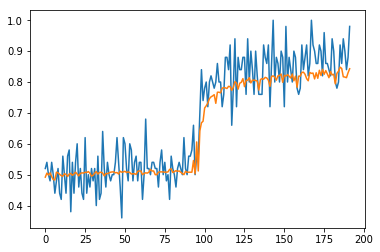

In [24]:
import matplotlib.pyplot as plt

t=range(len(accT))
plt.plot(t,accT)
plt.plot(t,accV)
plt.show()